In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

* read the csv file and check the head and info

In [38]:
df= pd.read_csv('train.csv', index_col=0)

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [41]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='PassengerId'>

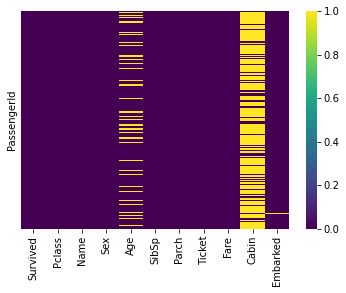

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True, cmap='viridis')

* drop Cabin columns , it contains too many NaN values(687 of 891)
* drop Passenger ID column as it only show index , not useful for the model

In [43]:
df['Cabin'].isna().sum()

687

In [44]:
df.drop('Cabin' , axis=1 , inplace= True)

In [45]:
X = df.drop('Survived',axis=1)

In [46]:
y=df['Survived']

* Check X and y shapes

In [47]:
X.shape , y.shape

((891, 9), (891,))

* Split the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,S
858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S
82,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,S
320,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,C
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,S
...,...,...,...,...,...,...,...,...,...
576,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S
839,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S
338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,C


In [50]:
X_train.shape , y_test.shape

((712, 9), (179,))

* create a heatmap for null values

<AxesSubplot:>

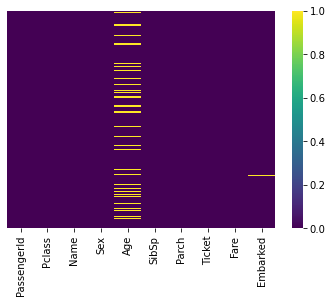

In [16]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=True, cmap='viridis')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

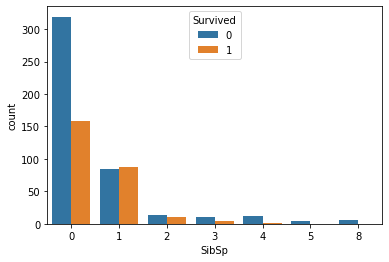

In [15]:
sns.countplot(x='SibSp', data=X_train, hue = y_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

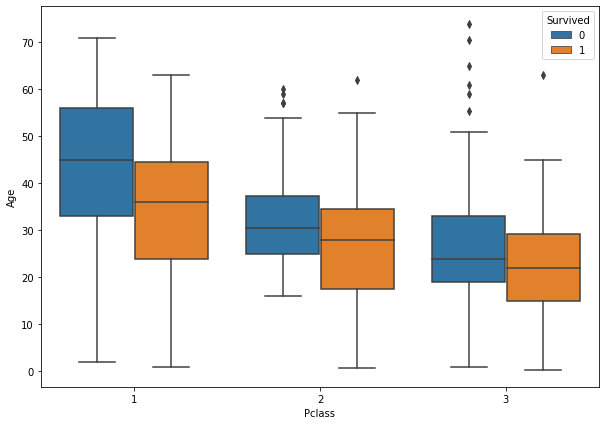

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=X_train, hue =y_train)

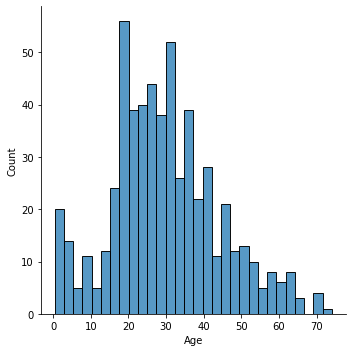

In [20]:
sns.displot(X_train['Age'],bins=30)

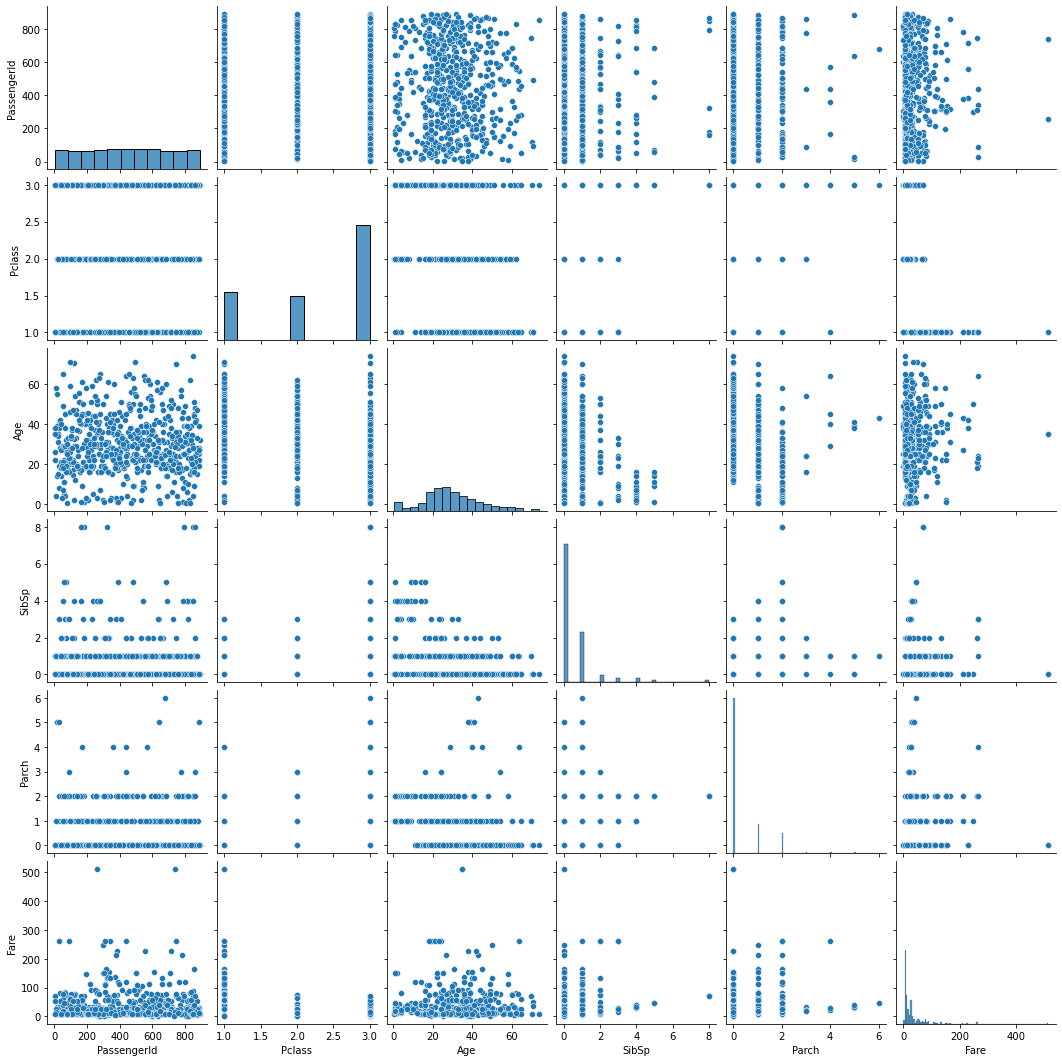

In [21]:
sns.pairplot(X_train)

* fill in the missing values 
* in Age using SimpleImputer
* Transform Sex, Embraked and Pclass using OHE  

In [22]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,S
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S
81,82,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,S
319,320,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,C
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,S
...,...,...,...,...,...,...,...,...,...,...
575,576,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S
838,839,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S
337,338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,C
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,C


In [51]:
numerical_columns =['Age']
categorical_columns = ['Pclass','Embarked','Sex']

In [52]:
column_transformer = ColumnTransformer([
    ('age', SimpleImputer(strategy='mean'), ['Age']),
    ('New_SEP', OneHotEncoder(sparse=False, handle_unknown='error', drop='if_binary' ),categorical_columns)
    ]#, remainder='passthrough'
    )

In [53]:
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('age', SimpleImputer(), ['Age']),
                                ('New_SEP',
                                 OneHotEncoder(drop='if_binary', sparse=False),
                                 ['Pclass', 'Embarked', 'Sex'])])

In [54]:
X_train_fe = column_transformer.transform(X_train)

In [55]:
X_train_fe[0]

array([23.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.])

In [56]:
X_test_fe = column_transformer.transform(X_test)

In [57]:
X_test_fe[0]

array([45.5,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ])

In [58]:
m = LogisticRegression()

In [59]:
m.fit(X_train_fe, y_train)

C:\Users\nadim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
m.score(X_train_fe, y_train)

0.800561797752809

In [61]:
m.score(X_test_fe, y_test)

0.8212290502793296

In [62]:
predictions = m.predict(X_test_fe)

In [63]:
from sklearn.metrics import classification_report

In [64]:
 print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.88      0.70      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [65]:
test= pd.read_csv('test.csv', index_col=0)

In [66]:
test.drop('Cabin', axis=1 , inplace=True)

In [67]:
test_fe = column_transformer.transform(test)


In [73]:
 Survived = m.predict(test_fe)

In [74]:
test['Survived'] = Survived

In [77]:
Submission = pd.DataFrame(test['Survived'])


In [79]:
Submission.to_csv('Submission.csv')